In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fmnist = tf.keras.datasets.mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

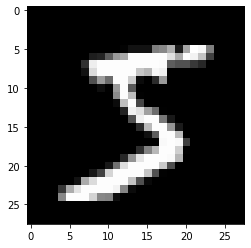

In [4]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index], cmap='gray')

In [5]:
training_images.shape

(60000, 28, 28)

In [17]:
training_labels.shape

(60000,)

In [6]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [26]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.Conv2D()
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9))

model.fit(training_images, training_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9185
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0957
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9393
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8488
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7733
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7331
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6857
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6545
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6205
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5929
Epoch 11/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5746
Epoch 12/100
1875/1875 [==============================] - 4s 2ms/step - lo

In [25]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 8.4111


8.41108512878418

# Using Callbacks to control training